In [570]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [571]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [572]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [573]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [574]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [575]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [576]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [577]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [578]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [579]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [580]:
df["recommended"] = df["recommended"].astype(int)

In [581]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_reviews", "author.num_games_owned", "author.playtime_at_review"]

In [582]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

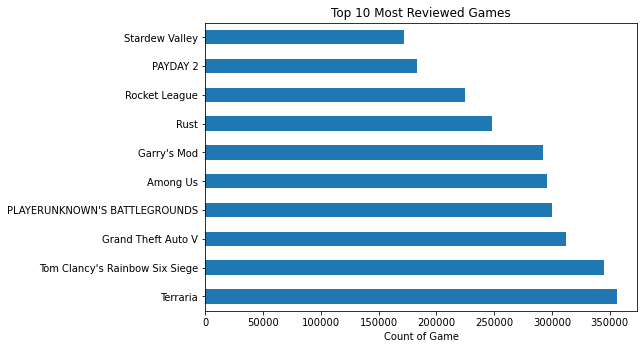

In [583]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [584]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


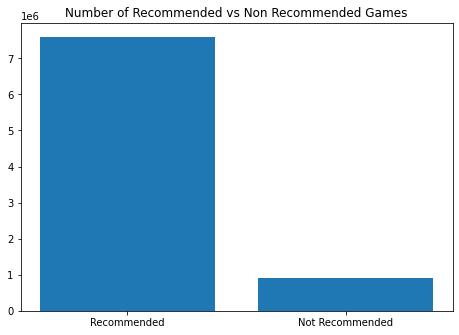

In [585]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [586]:
len(df)

8502031

In [587]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
num_yes_rec = len(df[df["recommended"]==1])

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

# The left over data will be used for prediction testing of our classifiers
no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

# Unclassified data set
df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [588]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [589]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [590]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
2684354,6077492,Tom Clancy's Rainbow Six Siege,english,bad,1585360509,1585360509,0,0,0,0,True,False,False,141,10,3051.0,0.0,3051.0,1.582931e+09
93801,323751,The Witcher 3: Wild Hunt,english,Boring. Repetitive. Not the game for me.,1523661718,1523661718,0,5,4,5,True,False,False,151,28,5823.0,0.0,5823.0,1.523161e+09
2932924,6669169,Tom Clancy's Rainbow Six Siege,english,AWESOME,1476082218,1586354877,0,0,0,1,True,False,False,38,4,246812.0,1006.0,988.0,1.610824e+09
7317436,16866050,No Man's Sky,english,game is boring and repetitive. If you miss ou...,1472479075,1472479075,0,1,0,0,True,False,False,71,1,378.0,0.0,378.0,1.471200e+09
7283098,16811318,No Man's Sky,english,Boring game,1537609357,1537609357,0,0,0,0,True,False,False,119,28,755.0,0.0,755.0,1.533025e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545915,7789771,Rust,english,Devs are great! so many amazing ideas for the ...,1402310757,1542887311,1,0,0,0,True,False,False,223,10,47057.0,0.0,46228.0,1.585379e+09
6780016,15790531,The Elder Scrolls Online,english,skyrim with friends... enough said,1455051980,1455051980,1,0,2,0,True,False,False,82,26,2604.0,0.0,1109.0,1.571090e+09
4470692,9695544,Don't Starve,english,"My favorite game to relax and chill, and also ...",1598404476,1598404476,1,0,0,0,True,False,False,67,1,4263.0,0.0,4156.0,1.598664e+09
4493390,9759264,Don't Starve,english,Don't Starve is one of the more popular games ...,1411623500,1411623500,1,2,0,0,True,False,False,167,12,12616.0,0.0,1977.0,1.607587e+09


In [591]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
#updated_df = shuffled[:100000]

updated_df = shuffled

## Normilazation

In [592]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
352735,920314,Garry's Mod,english,very yes i did\n,1609200581,1609200581,1,0,0,0,True,False,False,21,3,14743.0,0.0,14743.0,1.608955e+09
590717,1423392,Garry's Mod,english,Garry's mod is for people who enjoy a challang...,1441660002,1441660002,1,1,0,0,True,False,False,51,14,198126.0,0.0,17471.0,1.603238e+09
130669,427306,The Witcher 3: Wild Hunt,english,"This is probably the best, most story rich gam...",1470119300,1470119300,1,0,0,0,True,False,False,72,7,19523.0,0.0,7913.0,1.523170e+09
275580,757727,Portal 2,english,i like portals,1561978222,1561978222,1,0,0,0,False,False,False,92,10,180.0,0.0,144.0,1.572622e+09
4273215,9296311,Tomb Raider,english,good in all aspects,1421645709,1421645709,1,0,0,0,False,False,False,25,1,1252.0,0.0,826.0,1.423282e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679322,8089278,Assassin's Creed Odyssey,english,"Well, to start my review I gotta say, I haven'...",1598391023,1598391023,1,0,0,0,True,False,False,93,1,9661.0,0.0,8133.0,1.600389e+09
1979690,4583505,Wallpaper Engine,english,yes\n,1593980410,1593980410,1,0,0,0,True,False,False,38,11,1371.0,11.0,1143.0,1.610173e+09
7245649,16747038,No Man's Sky,english,I'm absolutely hooked. There's a ton of stuff ...,1602434429,1602434429,1,0,0,0,True,False,False,47,12,5090.0,0.0,4408.0,1.603481e+09
5607996,12037861,Age of Empires II (2013),english,My Childhood game!!! I spent hours on this gam...,1584415205,1584415205,1,0,0,0,True,False,False,113,1,5277.0,0.0,2596.0,1.587099e+09


In [593]:
# # Normalize via l2 norm
# def normalize(x, cols):
#     for col in cols:
#         col_sum = x[col].sum()
#         for index, row in x.iterrows():
#             st = row[col]
#             new = st/col_sum
#             x.loc[index, [col]] = new
#     return x

# updated_df = normalize(updated_df, classifier_cols)

# updated_df

## Sentiment Analysis

In [594]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [595]:
#polarityT = [TextBlob(str(review)).polarity for review in updated_df["review"]]
#updated_df["polarityT"] = polarityT
#updated_df

In [596]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

updated_df = calc_polarity(updated_df)
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
352735,920314,Garry's Mod,english,very yes i did\n,1609200581,1609200581,1,0,0,0,True,False,False,21,3,14743.0,0.0,14743.0,1.608955e+09,0.4576
590717,1423392,Garry's Mod,english,Garry's mod is for people who enjoy a challang...,1441660002,1441660002,1,1,0,0,True,False,False,51,14,198126.0,0.0,17471.0,1.603238e+09,0.8225
130669,427306,The Witcher 3: Wild Hunt,english,"This is probably the best, most story rich gam...",1470119300,1470119300,1,0,0,0,True,False,False,72,7,19523.0,0.0,7913.0,1.523170e+09,0.9966
275580,757727,Portal 2,english,i like portals,1561978222,1561978222,1,0,0,0,False,False,False,92,10,180.0,0.0,144.0,1.572622e+09,0.3612
4273215,9296311,Tomb Raider,english,good in all aspects,1421645709,1421645709,1,0,0,0,False,False,False,25,1,1252.0,0.0,826.0,1.423282e+09,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679322,8089278,Assassin's Creed Odyssey,english,"Well, to start my review I gotta say, I haven'...",1598391023,1598391023,1,0,0,0,True,False,False,93,1,9661.0,0.0,8133.0,1.600389e+09,0.9534
1979690,4583505,Wallpaper Engine,english,yes\n,1593980410,1593980410,1,0,0,0,True,False,False,38,11,1371.0,11.0,1143.0,1.610173e+09,0.4019
7245649,16747038,No Man's Sky,english,I'm absolutely hooked. There's a ton of stuff ...,1602434429,1602434429,1,0,0,0,True,False,False,47,12,5090.0,0.0,4408.0,1.603481e+09,0.9679
5607996,12037861,Age of Empires II (2013),english,My Childhood game!!! I spent hours on this gam...,1584415205,1584415205,1,0,0,0,True,False,False,113,1,5277.0,0.0,2596.0,1.587099e+09,0.7530


## Naive Bayes Classification

In [597]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [598]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [599]:
x_train_NB

array([[ 1.000e+00,  0.000e+00,  1.990e+02,  2.831e+03,  3.300e+01,
        -8.328e-01],
       [ 0.000e+00,  0.000e+00,  2.800e+01,  3.400e+02,  8.000e+00,
         5.106e-01],
       [ 0.000e+00,  0.000e+00,  2.060e+02,  2.150e+02,  2.600e+01,
         4.404e-01],
       ...,
       [ 0.000e+00,  0.000e+00,  4.600e+01,  2.306e+03,  3.000e+00,
         6.249e-01],
       [ 0.000e+00,  0.000e+00,  6.100e+01,  4.332e+03,  3.000e+00,
         1.779e-01],
       [ 2.000e+00,  0.000e+00,  4.470e+02,  5.300e+01,  1.900e+01,
         9.694e-01]])

In [600]:
y_test_NB

array([0, 0, 1, ..., 1, 1, 1])

In [601]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [602]:
x_test_NB

array([[ 0.000e+00,  0.000e+00,  5.200e+01,  8.407e+03,  9.000e+00,
        -9.033e-01],
       [ 0.000e+00,  0.000e+00,  1.340e+02,  1.440e+02,  4.000e+00,
        -7.359e-01],
       [ 0.000e+00,  0.000e+00,  5.300e+01,  8.140e+02,  1.600e+01,
         4.019e-01],
       ...,
       [ 0.000e+00,  0.000e+00,  4.600e+01,  7.780e+02,  5.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  3.900e+01,  2.130e+03,  7.000e+00,
         6.369e-01],
       [ 1.000e+00,  0.000e+00,  1.910e+02,  6.690e+03,  7.000e+00,
         4.215e-01]])

In [603]:
y_test_NB[:40]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [604]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [605]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.88833


In [606]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.88833
Precision: 0.8962343435161653
Recall: 0.9897240361391896
F1: 0.9406619799886288


## Classifier testing on untrained data

In [655]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [657]:
df_test_NB = calc_polarity(df_test_NB)

In [658]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
4302250,BattleBlock Theater,REALLY NICE GAME. SUPPORT INDIE!,0.7468,1,0,0,130,57.0,29
7985290,Terraria,This is a great game!! i've sunk countless hou...,0.7163,1,0,0,4,6541.0,1
8712704,Conan Exiles,A lot of fun. They need to populate the dungeo...,0.9786,1,1,0,35,8799.0,6
5585618,BeamNG.drive,Love this game ive been playing it for a long ...,0.8360,1,0,0,105,15249.0,2
5011510,Bloons TD 6,Me and my friend play it and we like it,0.7964,1,0,0,11,261.0,3
4393185,Undertale,gamesuycks lol,0.4215,0,0,3,60,13.0,15
6415478,PLAYERUNKNOWN'S BATTLEGROUNDS,"although I had fun playing it at times, it bri...",0.8126,0,0,0,70,1870.0,1
6561254,PLAYERUNKNOWN'S BATTLEGROUNDS,I thought this game would be great. However wh...,0.2500,0,2,0,50,52.0,2
6280412,Grand Theft Auto V,"Online was okay. Riddled with lack of polish, ...",-0.8360,0,0,0,263,13810.0,10
2115811,Warhammer: Vermintide 2,Free Weekend play...\n\nright off massive issu...,0.3734,0,3,1,297,967.0,102


In [659]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [660]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
4302250,REALLY NICE GAME. SUPPORT INDIE!,1,0,0,130,57.0,29,0.7468
7985290,This is a great game!! i've sunk countless hou...,1,0,0,4,6541.0,1,0.7163
8712704,A lot of fun. They need to populate the dungeo...,1,1,0,35,8799.0,6,0.9786
5585618,Love this game ive been playing it for a long ...,1,0,0,105,15249.0,2,0.8360
5011510,Me and my friend play it and we like it,1,0,0,11,261.0,3,0.7964
4393185,gamesuycks lol,0,0,3,60,13.0,15,0.4215
6415478,"although I had fun playing it at times, it bri...",0,0,0,70,1870.0,1,0.8126
6561254,I thought this game would be great. However wh...,0,2,0,50,52.0,2,0.2500
6280412,"Online was okay. Riddled with lack of polish, ...",0,0,0,263,13810.0,10,-0.8360
2115811,Free Weekend play...\n\nright off massive issu...,0,3,1,297,967.0,102,0.3734


In [661]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 1 1 1 1 1]


In [662]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [663]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1: 0.6666666666666666


## XGBoost Classification

In [664]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
352735,920314,Garry's Mod,english,very yes i did\n,1609200581,1609200581,1,0,0,0,True,False,False,21,3,14743.0,0.0,14743.0,1.608955e+09,0.4576
590717,1423392,Garry's Mod,english,Garry's mod is for people who enjoy a challang...,1441660002,1441660002,1,1,0,0,True,False,False,51,14,198126.0,0.0,17471.0,1.603238e+09,0.8225
130669,427306,The Witcher 3: Wild Hunt,english,"This is probably the best, most story rich gam...",1470119300,1470119300,1,0,0,0,True,False,False,72,7,19523.0,0.0,7913.0,1.523170e+09,0.9966
275580,757727,Portal 2,english,i like portals,1561978222,1561978222,1,0,0,0,False,False,False,92,10,180.0,0.0,144.0,1.572622e+09,0.3612
4273215,9296311,Tomb Raider,english,good in all aspects,1421645709,1421645709,1,0,0,0,False,False,False,25,1,1252.0,0.0,826.0,1.423282e+09,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679322,8089278,Assassin's Creed Odyssey,english,"Well, to start my review I gotta say, I haven'...",1598391023,1598391023,1,0,0,0,True,False,False,93,1,9661.0,0.0,8133.0,1.600389e+09,0.9534
1979690,4583505,Wallpaper Engine,english,yes\n,1593980410,1593980410,1,0,0,0,True,False,False,38,11,1371.0,11.0,1143.0,1.610173e+09,0.4019
7245649,16747038,No Man's Sky,english,I'm absolutely hooked. There's a ton of stuff ...,1602434429,1602434429,1,0,0,0,True,False,False,47,12,5090.0,0.0,4408.0,1.603481e+09,0.9679
5607996,12037861,Age of Empires II (2013),english,My Childhood game!!! I spent hours on this gam...,1584415205,1584415205,1,0,0,0,True,False,False,113,1,5277.0,0.0,2596.0,1.587099e+09,0.7530


In [665]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [666]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [667]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [668]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [669]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([0, 0, 1, ..., 1, 1, 1])

In [670]:
y_test_XGB

array([0, 0, 1, ..., 1, 1, 1])

In [671]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.812
Precision: 0.9676624821229938
Recall: 0.8170900796135612
F1: 0.8860246865678881


## Classifier testing on untrained data

In [672]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [673]:
df_test_XGB = calc_polarity(df_test_XGB)

In [674]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
5275852,The Elder Scrolls V: Skyrim,The only game which the My little ponies can b...,1,1,0,194,7103.0,6,0.7555
7747766,Watch_Dogs 2,Super good !,1,0,0,137,5391.0,5,0.7959
1614228,Hollow Knight,yeah it's pretty good i guess,1,0,0,63,4169.0,3,0.8074
7512754,Fallout 4,I liked it. Not the best RPG.,1,3,0,196,9643.0,14,-0.1451
7473929,Fallout 4,alright with mods,1,0,0,173,8897.0,15,0.2500
6431645,PLAYERUNKNOWN'S BATTLEGROUNDS,"So many hearts in the review section,I guess e...",0,1,1,387,612.0,3,0.6983
4711641,Rocket League,"Hi, i'm a more or less regular player since th...",0,0,0,126,58717.0,48,0.9991
3485912,Rust,Never seen such a combination of addictive and...,0,2,0,145,5113.0,7,0.2812
7023737,Kingdom Come: Deliverance,"Honestly, this game feels so damn unpolished. ...",0,0,0,130,1539.0,4,-0.8037
8464848,PAYDAY 2,DLC and micro transactions really killed this ...,0,12,1,155,15591.0,1,-0.8465


In [675]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [676]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [677]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [678]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1: 0.7272727272727272
